In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def generator_noisy_linear(parameters:tuple, n, sigma):
    x = [random.uniform(0,1) for _ in range(n)]
    x = np.array(x)
    
    eps = [random.gauss(0,sigma) for _ in range(n)]
    eps = np.array(eps)
    
    return x, parameters[0] + parameters[1]*x + eps, eps

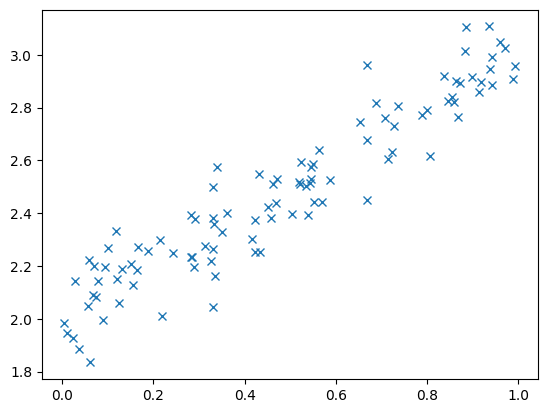

In [11]:
initial_beta = (2, 1)
n = 100
sigma = 0.1
dataset = generator_noisy_linear(initial_beta, n, sigma)
plt.plot(dataset[0], dataset[1], 'x')

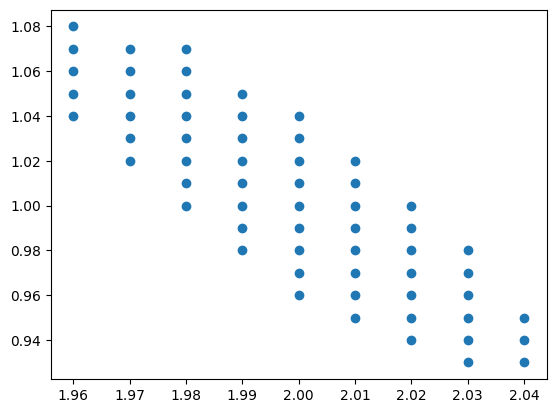

In [86]:
from scipy.stats import chi2


def matrix_calc(dataset):
    ones = np.ones_like(dataset[0])
    ones = np.expand_dims(ones, axis=0)

    X_T = np.expand_dims(dataset[0], axis=0)
    X_T = np.concatenate((ones, X_T), axis=0)
    X = np.transpose(X_T)

    X_T0X = np.matmul(X_T, X)
    X_T0y = np.matmul(X_T, dataset[1])

    beta_hat = np.linalg.inv(X_T0X)@X_T0y

    return X, X_T, X_T0X, X_T0y, beta_hat


def quantile(r, n=2):
    chi_squared = chi2(n)
    return chi_squared.ppf(r)

def chi_2(beta_wave, beta_hat, X_T0X, sigma=sigma):
    return 1/sigma**2 * np.transpose(beta_wave - beta_hat)@X_T0X@(beta_wave - beta_hat)

def ellipsoid(dataset, r=0.95):
    matrices = matrix_calc(dataset)

    _quantile = quantile(r)
    beta0 = np.arange(-3,3,0.01)
    beta1 = np.arange(-3,3,0.01)

    ellipsoid_x = np.zeros_like(beta0)
    ellipsoid_y = np.zeros_like(beta0)

    i = 0

    for _beta0 in beta0:
        for _beta1 in beta1:
            if chi_2(np.array([_beta0, _beta1]), matrices[4], matrices[2]) < _quantile:
                ellipsoid_x[i], ellipsoid_y[i]  = _beta0, _beta1
                i += 1
    
    return ellipsoid_x[:i], ellipsoid_y[:i]



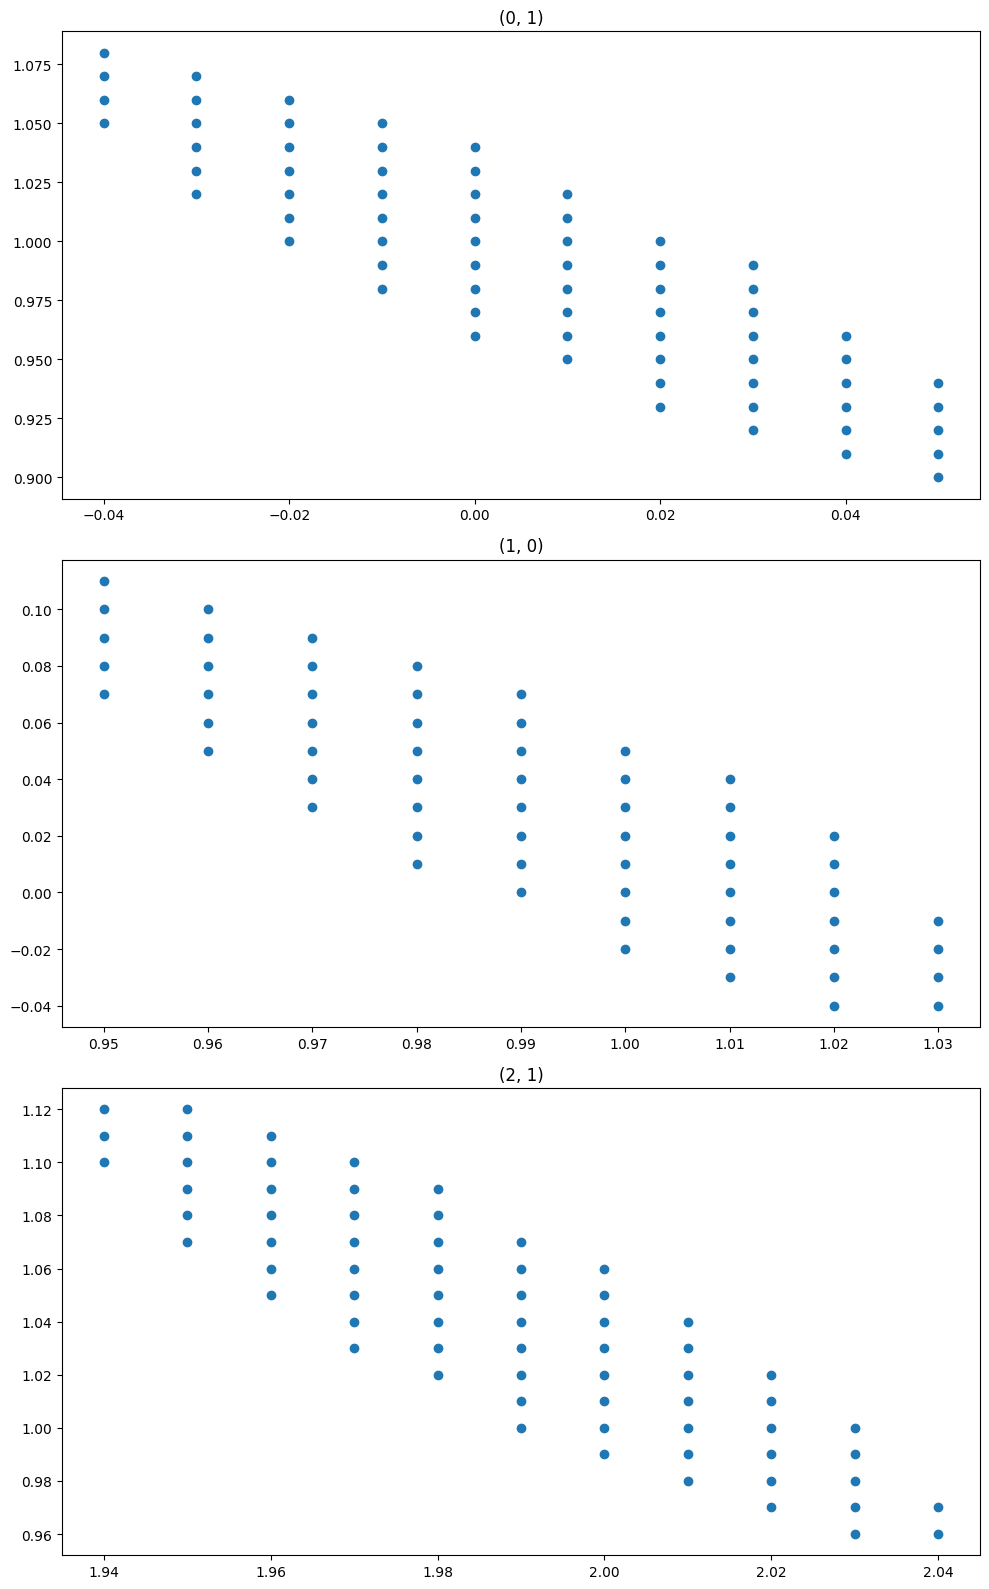

In [91]:
betas = [(0,1), (1,0), (2,1)]

fig, axs = plt.subplots(len(betas), 1, figsize=(10, 16))

for x in range(len(betas)):
    dataset = generator_noisy_linear(betas[x], n, sigma)
    ell = ellipsoid(dataset)
    axs[x].scatter(ell[0], ell[1])
    axs[x].set_title(betas[x])

fig.tight_layout()

